In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.head()

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Duration,Zero_Crossings,Sex,Age,Species,Call
0,0.083313,0.015951,848.0,263.00,2,-10.254556,1,706,NaN,A,A. jubatus,growl
1,0.296424,0.035485,3645.5,452.25,21,-10.254556,4,3456,NaN,A,A. jubatus,NaN
2,0.171860,0.022913,2181.8,308.00,8,-10.254556,5,2984,NaN,A,A. jubatus,growl
3,0.243933,0.023587,3437.0,314.00,11,-10.254556,5,3108,NaN,A,A. jubatus,NaN
4,0.194653,0.029304,2189.0,331.00,5,-10.254556,3,1919,NaN,A,A. jubatus,growl


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amp_range       463 non-null    float64
 1   Avg_amp         463 non-null    float64
 2   Freq_range      463 non-null    float64
 3   Pulses_per_Sec  463 non-null    float64
 4   Partials        463 non-null    int64  
 5   MFCC            463 non-null    float64
 6   Duration        463 non-null    int64  
 7   Zero_Crossings  463 non-null    int64  
 8   Sex             342 non-null    object 
 9   Age             375 non-null    object 
 10  Species         463 non-null    object 
 11  Call            450 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 43.5+ KB


In [5]:
df.describe(include='all')

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Duration,Zero_Crossings,Sex,Age,Species,Call
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,342,375,463,450
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,6,9,28
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187,262,113,208
mean,0.172086,0.019025,4463.574141,650.632934,7.734341,-16.697629,4.198704,7744.779698,NaN,NaN,NaN,NaN
std,0.150026,0.017871,3070.408521,668.599927,10.174912,8.567397,3.644874,9319.442262,NaN,NaN,NaN,NaN
min,0.003207,0.000551,1.000000,0.000000,0.000000,-29.455383,1.000000,281.000000,NaN,NaN,NaN,NaN
25%,0.056398,0.005321,2199.375000,230.166667,1.000000,-25.048552,2.000000,2502.500000,NaN,NaN,NaN,NaN
50%,0.141724,0.013124,3777.000000,410.400000,4.000000,-17.067156,3.000000,4550.000000,NaN,NaN,NaN,NaN
75%,0.239012,0.027823,6807.460317,774.500000,12.000000,-8.300884,5.000000,9680.000000,NaN,NaN,NaN,NaN


In [6]:
df['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'call', 'unknown',
       'growl/hiss', 'call sequence', 'purr', 'purr sequence', 'Growl',
       'Hiss', 'Loud rumble/roar', 'Sharp Hiss', 'call?', 'roar',
       'roar or call', 'growl ', 'roar?', 'main call', 'call/growl',
       'Call sequence(possible mew)', 'mew', 'hiss ', 'call sequence?',
       'single call?', 'mew?', 'grow/hiss'], dtype=object)

In [7]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['growl', nan, 'hiss', 'call', 'growl/hiss', 'purr', 'roar',
       'call/growl', 'mew'], dtype=object)

In [8]:
df['Age'].unique()

array(['A', 'Adult', 'Adult ', 'Juvenile ', 'juvenile', nan, 'Juvenile'],
      dtype=object)

In [9]:
clean2 = {'A':'Adult','Adult ':'Adult', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Adult', 'Juvenile', 'Unknown'], dtype=object)

In [10]:
df['Sex'].unique()

array([nan, 'G (1 M and 2F)', 'P', 'F', 'Pair (Unknown)', 'Female ',
       'Male', 'male ', 'G', 'Female', 'M', 'Unknown'], dtype=object)

In [11]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 'G (1 M and 2F)':'Group'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [12]:
df.describe(include='all')

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Duration,Zero_Crossings,Sex,Age,Species,Call
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463,463,463,444
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,9,8
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201,350,113,233
mean,0.172086,0.019025,4463.574141,650.632934,7.734341,-16.697629,4.198704,7744.779698,NaN,NaN,NaN,NaN
std,0.150026,0.017871,3070.408521,668.599927,10.174912,8.567397,3.644874,9319.442262,NaN,NaN,NaN,NaN
min,0.003207,0.000551,1.000000,0.000000,0.000000,-29.455383,1.000000,281.000000,NaN,NaN,NaN,NaN
25%,0.056398,0.005321,2199.375000,230.166667,1.000000,-25.048552,2.000000,2502.500000,NaN,NaN,NaN,NaN
50%,0.141724,0.013124,3777.000000,410.400000,4.000000,-17.067156,3.000000,4550.000000,NaN,NaN,NaN,NaN
75%,0.239012,0.027823,6807.460317,774.500000,12.000000,-8.300884,5.000000,9680.000000,NaN,NaN,NaN,NaN


In [13]:
#Creating new clean dataframe and saving to CSV
df.to_csv('cleaned.csv', index=False)

In [14]:
continuous = ['Amp_range','Avg_amp','Freq_range', 'Pulses_per_Sec','Partials','MFCC', 'Duration', 'Zero_Crossings']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [15]:
categorical = ['Sex', 'Age', 'Species']

for var in categorical:
    df = pd.concat([df, pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Amp_range               463 non-null    float64
 1   Avg_amp                 463 non-null    float64
 2   Freq_range              463 non-null    float64
 3   Pulses_per_Sec          463 non-null    float64
 4   Partials                463 non-null    float64
 5   MFCC                    463 non-null    float64
 6   Duration                463 non-null    float64
 7   Zero_Crossings          463 non-null    float64
 8   Call                    444 non-null    object 
 9   Sex_Female              463 non-null    uint8  
 10  Sex_Group               463 non-null    uint8  
 11  Sex_Male                463 non-null    uint8  
 12  Sex_Pair                463 non-null    uint8  
 13  Sex_Unknown             463 non-null    uint8  
 14  Age_Adult               463 non-null    ui

In [16]:
X = df[pd.notnull(df['Call'])].drop(['Call'], axis=1)
y = df[pd.notnull(df['Call'])]['Call']

In [17]:
print(X.shape)
print(y.shape)

(444, 25)
(444,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [19]:
print('Calls trained for but not tested for')
print(set(np.unique(y_train))-set(np.unique(y_test)))
print('Calls test for but not trained for')
print(set(np.unique(y_test))-set(np.unique(y_train)))

Calls trained for but not tested for
{'growl/hiss'}
Calls test for but not trained for
set()


In [20]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')
#eval_metric='mlogloss'

clf = XGBClassifier(**parameters, n_estimators=1200)

In [21]:
clf.fit(X_train, y_train)

C:\Users\exant\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [22]:
clf.score(X_train, y_train)

1.0

In [23]:
clf.score(X_test,y_test)

0.8656716417910447

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'mew' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'mew' 'purr' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl'}


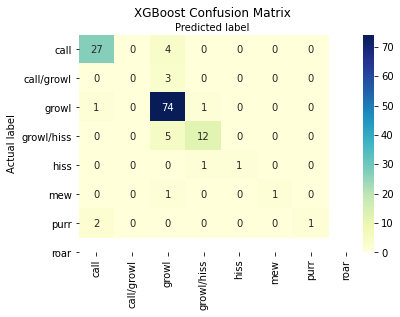

In [26]:
names = ['call', 'call/growl','growl','growl/hiss','hiss','mew','purr', 'roar']
cnf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
clf_svc = SVC()

In [28]:
clf_svc.fit(X_train, y_train)

SVC()

In [29]:
clf_svc.score(X_train, y_train)

0.8419354838709677

In [30]:
clf_svc.score(X_test, y_test)

0.8208955223880597

In [31]:
y_pred_svc=clf_svc.predict(X_test)
np.unique(y_pred_svc)

array(['call', 'growl', 'hiss', 'purr'], dtype=object)

In [32]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_svc))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_svc))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_svc)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'mew' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl', 'roar', 'mew'}


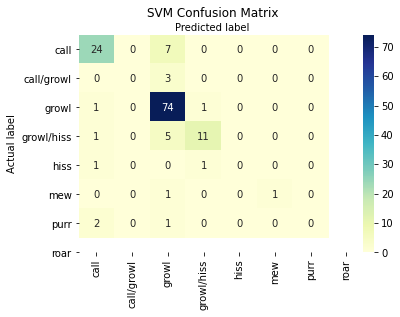

In [33]:
cnf = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
gnb = GaussianNB()

In [35]:
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
gnb.score(X_train, y_train)

0.3193548387096774

In [37]:
gnb.score(X_test, y_test)

0.26119402985074625

In [38]:
y_pred_nb = gnb.predict(X_test)

In [39]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_nb))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_nb))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_nb)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'mew' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'growl/hiss' 'hiss' 'mew' 'purr' 'roar']
3. Not tested for but predicted
{'growl/hiss'}
4. Tested for but not predicted
{'call/growl'}


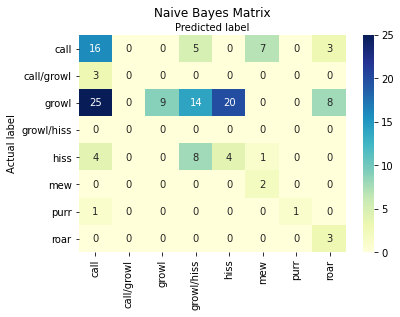

In [40]:
cnf = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('Naive Bayes Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
#The data is unbalanced, this could be fixed by updating the class weights 
#Or getting more varied data
df['Call'].value_counts()

growl         233
call          106
hiss           63
roar           12
purr           11
mew             9
growl/hiss      6
call/growl      4
Name: Call, dtype: int64